In [25]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from scipy import signal
import numpy as np
import pandas as pd
from src.plot_raw import plot_raw
from matplotlib import pyplot as plt

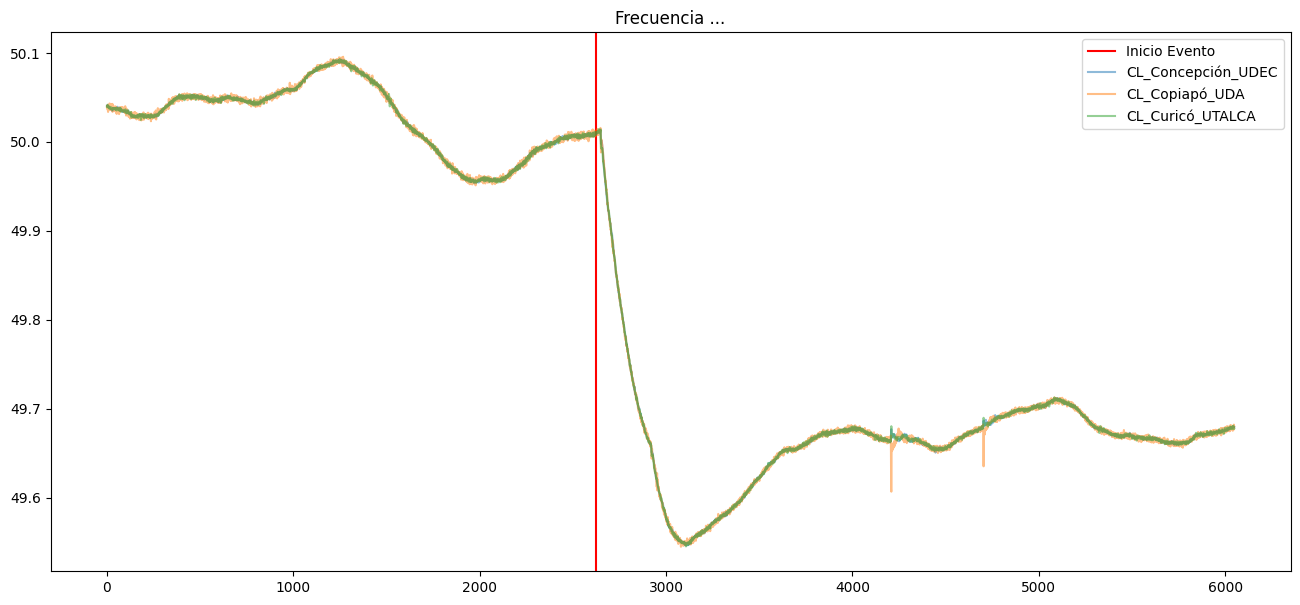

In [4]:
input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [23]:
from src.objective_function import modelo_1

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

Ts = 0.3

sys_k = modelo_1(params,Ts)

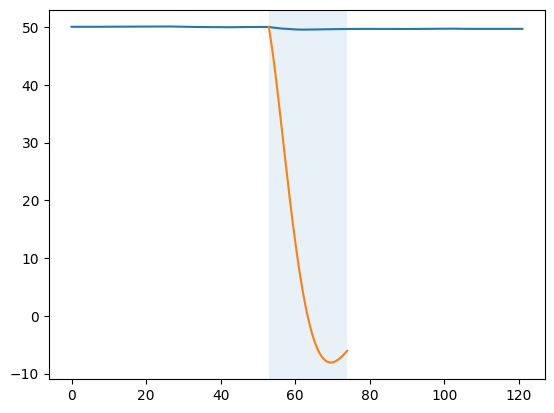

In [6]:
## Esto es para el "result ploter"

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
real_time = df["Tiempo [s]"].to_numpy()
real_freq = df["Frecuencia [Hz]"].to_numpy()
real_power = df["Potencia [MW]"].to_numpy()

event_time = df["Tiempo [s]"][df["Evento"]==1].to_numpy()
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()
event_power = df["Potencia [MW]"][df["Evento"]==1].to_numpy()

plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)

sim_time = np.arange(event_time[0],event_time[-1],Ts)
P0 = event_power[0] / 1000
sim_power = P0 * np.repeat(1,sim_time.shape)


sim = signal.dlsim(sys_k, sim_power, x0 = event_freq[0])

plt.plot(sim_time,sim[1])

In [24]:
from src.objective_function import objective_function



Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000
x0 = event_freq[0]

args = (model, Ts, P0, x0, event_freq)

objective_function(params, args)

428159.742116734

In [33]:
input_path = r".\data\raw\2021 set n1\2021_05_02-16_44_00.csv"

df = pd.read_csv(input_path)
df["Time Stamp"][0]

'2021-05-02 16:44:00.000000'

In [88]:
Ts = 0.1
freq = df[df.index % int(Ts / 0.02) == 0]["CIO"]
power =  df[df.index % int(Ts / 0.02) == 0]["Potencia"]
time = Ts * np.arange(freq.size)
event = (df[df.index % int(Ts / 0.02) == 0].index >= df["Inicio"][0]).astype(int)

d = {'time':time, 'freq':freq, 'power':power, 'event':event}

pd.DataFrame(data=d).to_csv("./test.csv", index=False)

In [80]:
event = (df[df.index % int(Ts / 0.02) == 0].index >= df["Inicio"][0]).astype(int)
event

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
a = '.1'
Ts = .3
s =100
Ts * np.arange(s)

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
        3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
        6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
        9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
       13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. , 15.3, 15.6, 15.9, 16.2,
       16.5, 16.8, 17.1, 17.4, 17.7, 18. , 18.3, 18.6, 18.9, 19.2, 19.5,
       19.8, 20.1, 20.4, 20.7, 21. , 21.3, 21.6, 21.9, 22.2, 22.5, 22.8,
       23.1, 23.4, 23.7, 24. , 24.3, 24.6, 24.9, 25.2, 25.5, 25.8, 26.1,
       26.4, 26.7, 27. , 27.3, 27.6, 27.9, 28.2, 28.5, 28.8, 29.1, 29.4,
       29.7])